# CLUSTERING ALGORITHMS

In [1]:
#importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Set number of threads
import os
os.environ["OMP_NUM_THREADS"] = '1'

In [2]:
#loading the dataset
dataset=pd.read_csv('Wholesale customers data.csv')

In [3]:
dataset.shape

(440, 8)

In [4]:
dataset.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [5]:
#Description of the dataset
dataset.describe(include = "all")

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


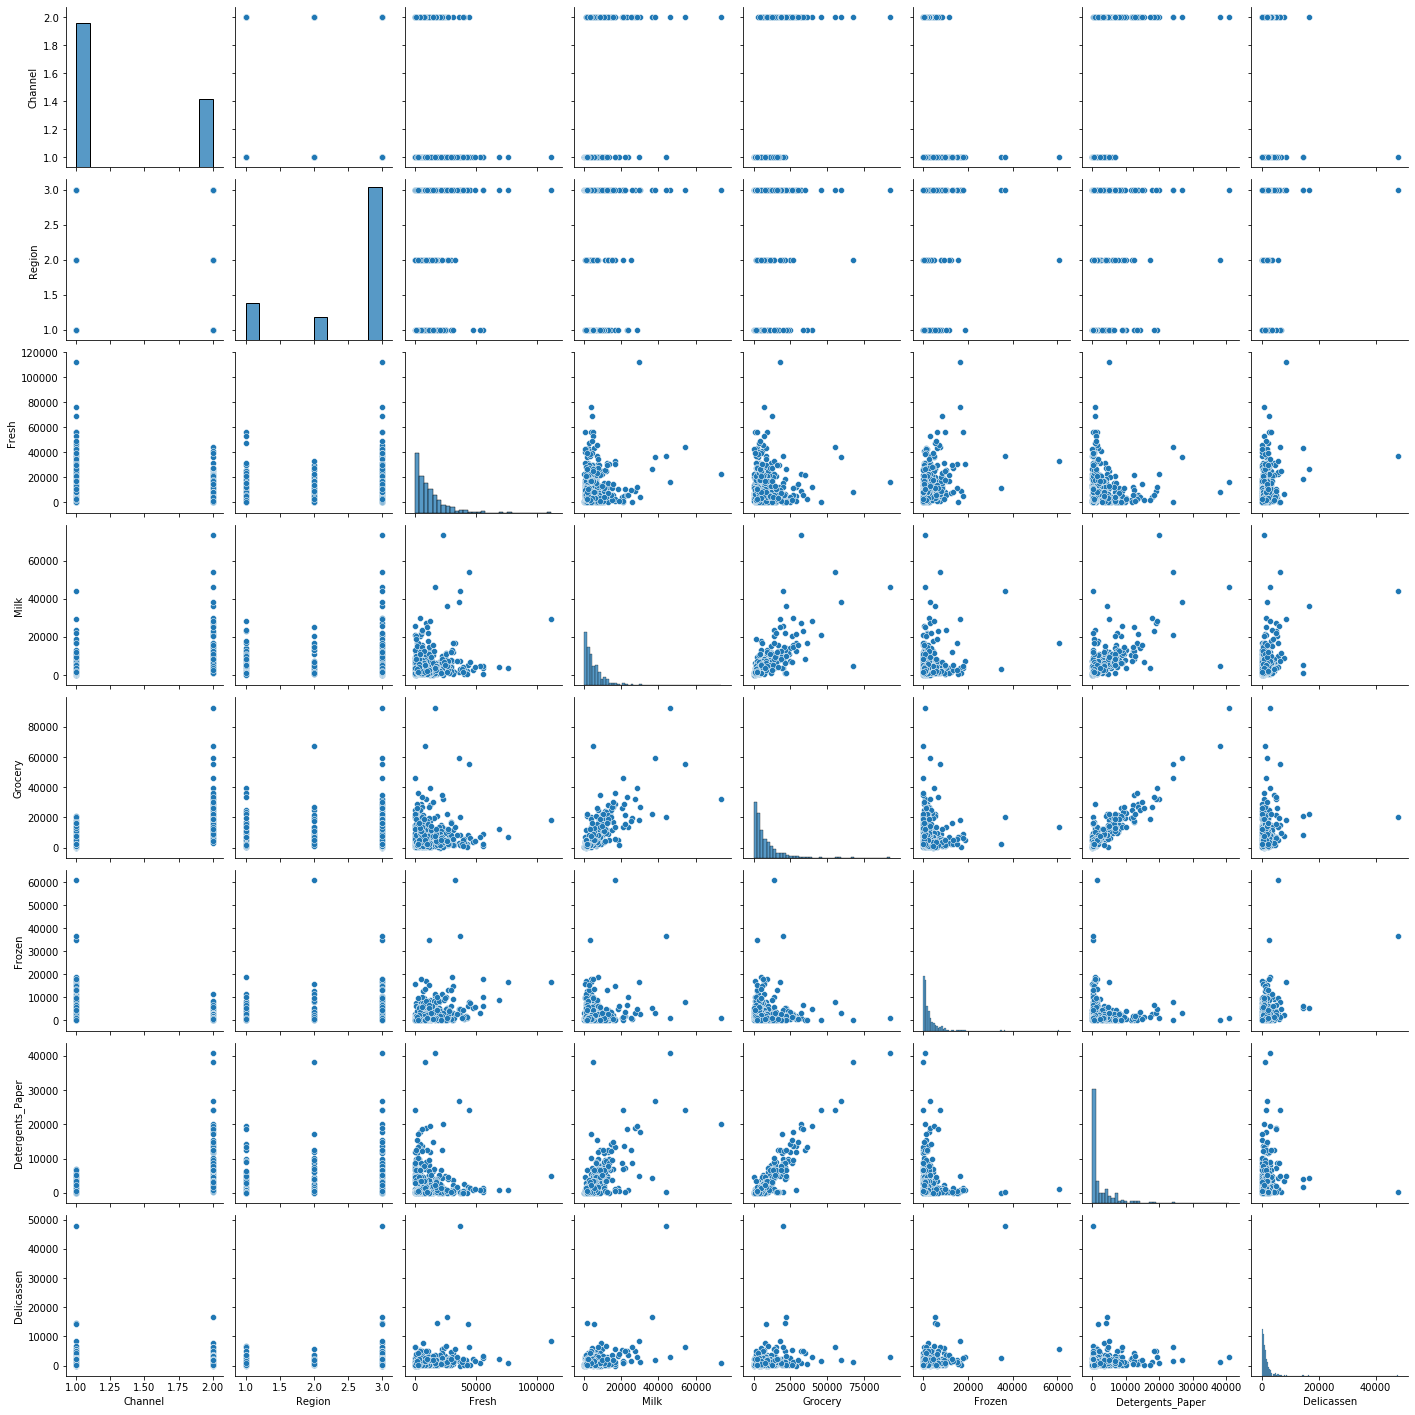

In [6]:
#Visualisation of the variables
sns.pairplot(dataset.iloc[:,0:8])

In [7]:
#checking for missing values
dataset.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [8]:
#exploring the unique values in the categorical features
print("Total categories in the feature Region:\n", dataset["Region"].value_counts(), "\n")
print("Total categories in the feature Channel:\n", dataset["Channel"].value_counts())

Total categories in the feature Region:
 3    316
1     77
2     47
Name: Region, dtype: int64 

Total categories in the feature Channel:
 1    298
2    142
Name: Channel, dtype: int64


In [9]:
#Changing values of the categorical variables

dataset['Channel']=dataset['Channel'].replace([1,2],['Horeca','Retail'])
dataset['Region']=dataset['Region'].replace([1,2,3],['Lisbon','Oporto', 'Other'])

In [10]:
dataset.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,Retail,Other,12669,9656,7561,214,2674,1338
1,Retail,Other,7057,9810,9568,1762,3293,1776
2,Retail,Other,6353,8808,7684,2405,3516,7844
3,Horeca,Other,13265,1196,4221,6404,507,1788
4,Retail,Other,22615,5410,7198,3915,1777,5185


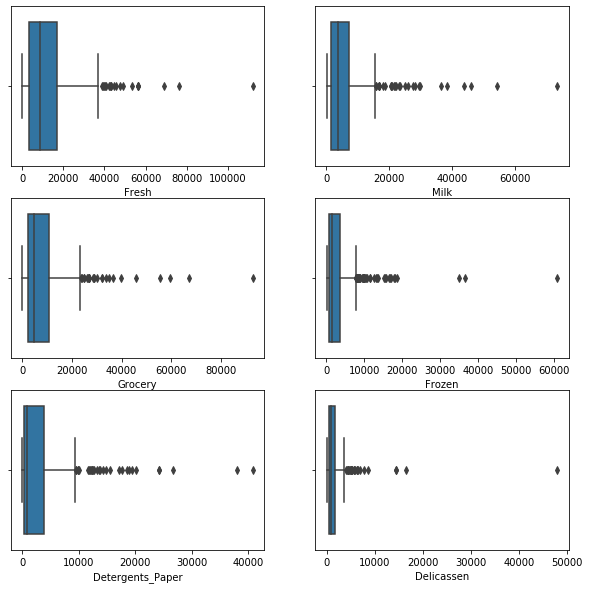

In [11]:
#Boxplot for Numerical Values
fig, ax = plt.subplots(3,2,figsize= (10,10))
sns.boxplot(x=dataset['Fresh'], ax=ax[0,0])
sns.boxplot(x=dataset['Milk'], ax=ax[0,1])
sns.boxplot(x=dataset['Grocery'], ax=ax[1,0])
sns.boxplot(x=dataset['Frozen'], ax=ax[1,1])
sns.boxplot(x=dataset['Detergents_Paper'], ax=ax[2,0])
sns.boxplot(x=dataset['Delicassen'], ax=ax[2,1])

In [12]:
#Treating outliers
DataKM = dataset 
DataKM = DataKM.drop('Region', inplace=False, axis=1)
DataKM = DataKM.drop('Channel', inplace=False, axis=1)

# replacing the outliers with their Inner fences
for k in list(DataKM.columns):
    IQR = np.percentile(DataKM[k],75) - np.percentile(DataKM[k],25)
    
    Outlier_top = np.percentile(DataKM[k],75) + 1.5*IQR
    Outlier_bottom = np.percentile(DataKM[k],25) - 1.5*IQR
    
    DataKM[k] = np.where(DataKM[k] > Outlier_top,Outlier_top,DataKM[k])
    DataKM[k] = np.where(DataKM[k] < Outlier_bottom,Outlier_bottom,DataKM[k])

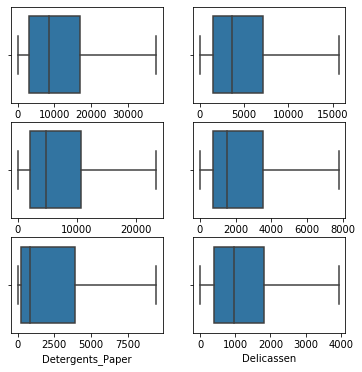

In [13]:
#Boxplot for Numerical Values
fig, ax = plt.subplots(3,2,figsize= (6,6))
sns.boxplot(x=DataKM['Fresh'], ax=ax[0,0])
sns.boxplot(x=DataKM['Milk'], ax=ax[0,1])
sns.boxplot(x=DataKM['Grocery'], ax=ax[1,0])
sns.boxplot(x=DataKM['Frozen'], ax=ax[1,1])
sns.boxplot(x=DataKM['Detergents_Paper'], ax=ax[2,0])
sns.boxplot(x=DataKM['Delicassen'], ax=ax[2,1])

In [14]:
#Adding the categorical variables to the new dataset
DataKM  =  pd.concat([dataset[['Channel','Region']],DataKM],axis=1)
DataKM.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,Retail,Other,12669.0,9656.0,7561.0,214.0,2674.0,1338.00
1,Retail,Other,7057.0,9810.0,9568.0,1762.0,3293.0,1776.00
2,Retail,Other,6353.0,8808.0,7684.0,2405.0,3516.0,3938.25
3,Horeca,Other,13265.0,1196.0,4221.0,6404.0,507.0,1788.00
4,Retail,Other,22615.0,5410.0,7198.0,3915.0,1777.0,3938.25


In [15]:
#Standardisation
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

#Creating dummies for categorical varibles
dataset = pd.get_dummies(dataset,columns=['Channel','Region'],drop_first=True)
DataKM = pd.get_dummies(DataKM,columns=['Channel','Region'],drop_first=True)


dataset=sc.fit_transform(dataset)
DataKM=sc.fit_transform(DataKM)


# K - Means Algorithm

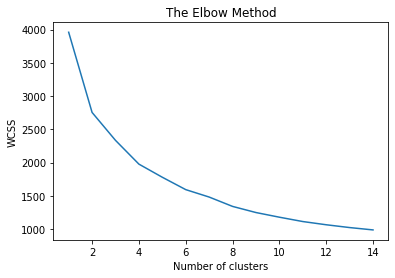

In [16]:
#finding the optimal value of K
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(DataKM)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [17]:
#Fitting K-Means to the dataset
model = KMeans(n_clusters=5, init = 'k-means++', random_state = 0)
y_kmmodel = model.fit_predict(DataKM)

In [18]:
#Principal component analysis to get the first 2 Principle components
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pcaKM = pca.fit_transform(DataKM)
pca.explained_variance_ratio_

array([0.37811059, 0.18537554])

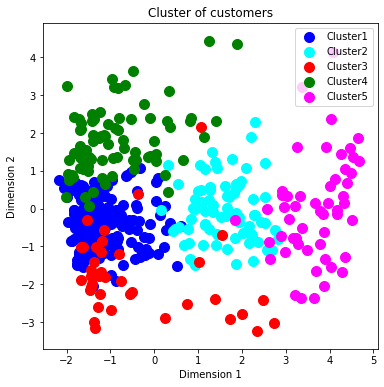

In [19]:
#Visualising the clusters

colors = ['blue', 'cyan', 'red', 'green', 'magenta']
plt.figure(figsize=(6,6))
for i in range(5):
    plt.scatter(pcaKM[y_kmmodel== i, 0], pcaKM[y_kmmodel== i, 1], 
                s = 100, c = colors[i], label = 'Cluster' +str(i+1))
plt.title('Cluster of customers')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

# DBSCAN ALGORITHM

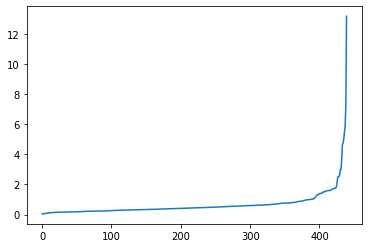

In [20]:
#Finding the value of Epsilon

from sklearn.neighbors import NearestNeighbors
neighbours = NearestNeighbors(n_neighbors= 2)
distances, indices = neighbours.fit(dataset).kneighbors(dataset)

distances = np.sort(distances, axis = 0) 
distances = distances[:, 1] 
plt.plot(distances) 
plt.show() 

In [21]:
#Implementing the DBSCAN Algorithm
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps = 2, min_samples = 16)
y_dbscan = dbscan.fit_predict(dataset)

y_dbscan

array([ 0,  0,  0,  1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  1,  0,
        1,  0,  1,  0,  1,  1, -1,  0,  0,  1,  1,  0,  1,  1,  1,  1,  1,
        1,  0,  1,  0,  0,  1,  1,  1,  0,  0,  0,  0,  0, -1,  0,  0,  1,
        1,  0,  0,  1,  1, -1,  0,  1,  1,  0, -1,  0,  0,  1, -1,  1,  0,
        1,  1,  1, -1,  1,  0,  0,  1,  1,  0,  1,  1,  1,  0,  0,  1,  0,
       -1, -1, -1,  1,  1,  1,  1, -1, -1,  0,  1,  0,  1,  1,  1,  0,  0,
        0, -1,  1,  1,  0,  0,  0,  0,  1,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  0,  1, -1,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  0,  0,  1,  0,  0,  0,  1,  1,  0,  0,  0,  0,  1,  1,  1,
        0, -1,  1,  0,  1,  0,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,
        1,  0,  0,  1,  1,  1,  0,  1,  1, -1, -1,  2,  2, -1, -1,  2,  2,
        2, -1,  2, -1,  2, -1,  2, -1,  2,  2, -1,  2, -1,  2, -1,  2,  2,
        2,  2, -1,  2,  2

In [22]:
#Principal component analysis to get the first 2 Principle components
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pcaDB = pca.fit_transform(dataset)
pca.explained_variance_ratio_

array([0.34448414, 0.20030278])

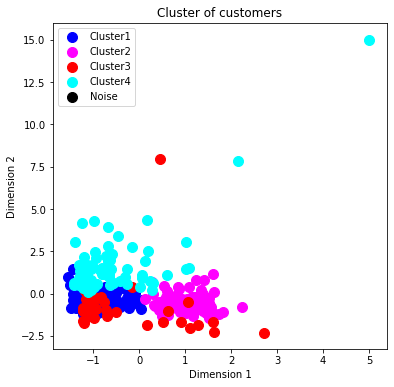

In [23]:
#Visualising the clusters

colors = ['blue', 'magenta', 'red', 'cyan']
plt.figure(figsize=(6,6))
for i in range(4):
    plt.scatter(pcaDB[y_kmmodel== i, 0], pcaDB[y_kmmodel== i, 1], 
                s = 100, c = colors[i], label = 'Cluster' +str(i+1))
plt.scatter(pcaDB[y_kmmodel== -1, 0], pcaDB[y_kmmodel== -1, 1], s = 100, c = 'black', label = 'Noise')
plt.title('Cluster of customers')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()